# **Task 1 - Exploratory Data Analysis**

## Section 1 - Setup

In [1]:
#importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # garbage collection that automatically frees up memory that is no longer being used

# suppress warnings
import warnings
warnings.filterwarnings('ignore')



## Section 2 - Data loading

In [2]:
from google.colab import drive

# Mount Google Drive to '/content/drive'
drive.mount('/content/drive')

# File ID from the Google Drive link
file_id = '1sKUEbE3WTVED30OKjtaQNfR_1TEqn8WK'

# Create the file URL using the file ID
file_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file from the URL
sales_data = pd.read_csv(file_url)

Mounted at /content/drive


In [3]:
#getting a general idea for the dataset
sales_data.head(5)
#here we have 2 indexing (1 provided by client itself and one from pandas,thus we remove one of them)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
# Drop the "Unnamed: 0" column
sales_data.drop(columns='Unnamed: 0', inplace=True)

# Reset the index to default integer-based index
sales_data.reset_index(drop=True, inplace=True)

# Now the DataFrame should no longer have the "Unnamed: 0" column and have a default index, this will help to reduce indexing issues
sales_data.head(5)


,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card



## Section 3 - Descriptive statistics


To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer


In [5]:
#Lets check for number of enteries
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


Thus it contains total of 7829 Enteries.

In [6]:
#Checking for any NULL values
null_counts = sales_data.isnull().sum()

print(null_counts)

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64


In [7]:
# Check for duplicate rows in the DataFrame
duplicates = sales_data.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
if num_duplicates > 0:
    print("There are {} duplicate rows in the DataFrame.".format(num_duplicates))
else:
    print("There are no duplicate rows in the DataFrame.")

There are no duplicate rows in the DataFrame.


In [8]:
# Calculate and print the number of unique values for each column
print("Found {:,d} unique transaction_id values".format(sales_data["transaction_id"].nunique()))
print("Found {:,d} unique timestamp values".format(sales_data["timestamp"].nunique()))
print("Found {:,d} unique product_id values".format(sales_data["product_id"].nunique()))
print("Found {:,d} unique category values".format(sales_data["category"].nunique()))
print("Found {:,d} unique customer_type values".format(sales_data["customer_type"].nunique()))
print("Found {:,d} unique unit_price values".format(sales_data["unit_price"].nunique()))
print("Found {:,d} unique quantity values".format(sales_data["quantity"].nunique()))
print("Found {:,d} unique total values".format(sales_data["total"].nunique()))
print("Found {:,d} unique payment_type values".format(sales_data["payment_type"].nunique()))

Found 7,829 unique transaction_id values
Found 7,738 unique timestamp values
Found 300 unique product_id values
Found 22 unique category values
Found 5 unique customer_type values
Found 64 unique unit_price values
Found 4 unique quantity values
Found 256 unique total values
Found 4 unique payment_type values


In [9]:
# Define the numeric columns for which you want to calculate descriptive statistics
numeric_columns = ['unit_price', 'quantity', 'total']

# Calculate the descriptive statistics for the numeric columns
descriptive_stats = sales_data[numeric_columns].describe().T

# Define a style to highlight the mean with a green color using a bar
style = descriptive_stats.style.bar(subset=['mean'], color='#7BCC70')

# Apply a red background gradient to the standard deviation
style = style.background_gradient(subset=['std'], cmap='Reds')

# Apply a blue-white-red background gradient to the median (50%)
style = style.background_gradient(subset=['50%'], cmap='coolwarm')

# Display the styled descriptive statistics
print("Descriptive Statistics for Numeric Columns:")
display(style)

Descriptive Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
unit_price,7829.000000,7.819480,5.388088,0.190000,3.990000,7.190000,11.190000,23.990000
quantity,7829.000000,2.501597,1.122722,1.000000,1.000000,3.000000,4.000000,4.000000
total,7829.000000,19.709905,17.446680,0.190000,6.570000,14.970000,28.470000,95.960000


## Section 4 - Visualisation
**Distribution of Numerical Columns:**

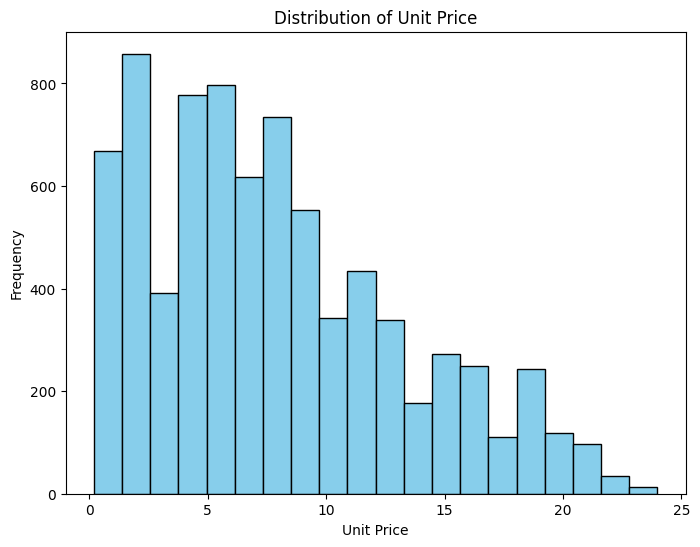

In [10]:
# Histogram of unit_price
plt.figure(figsize=(8, 6))
plt.hist(sales_data['unit_price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.show()



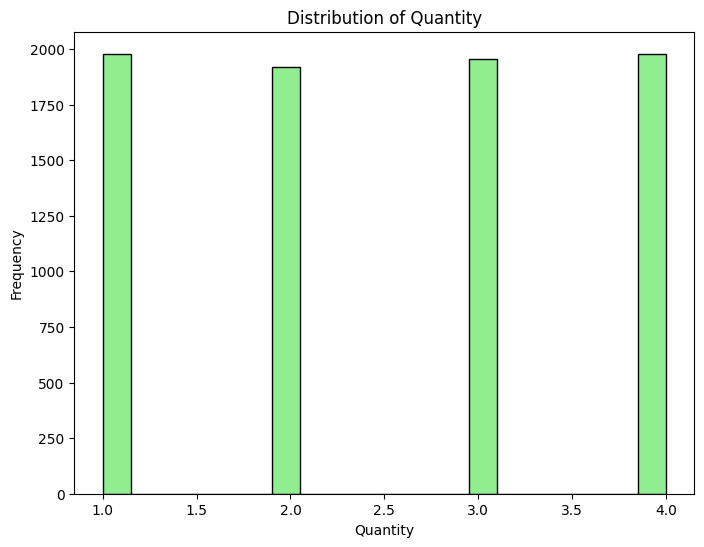

In [11]:
# Histogram of quantity
plt.figure(figsize=(8, 6))
plt.hist(sales_data['quantity'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()


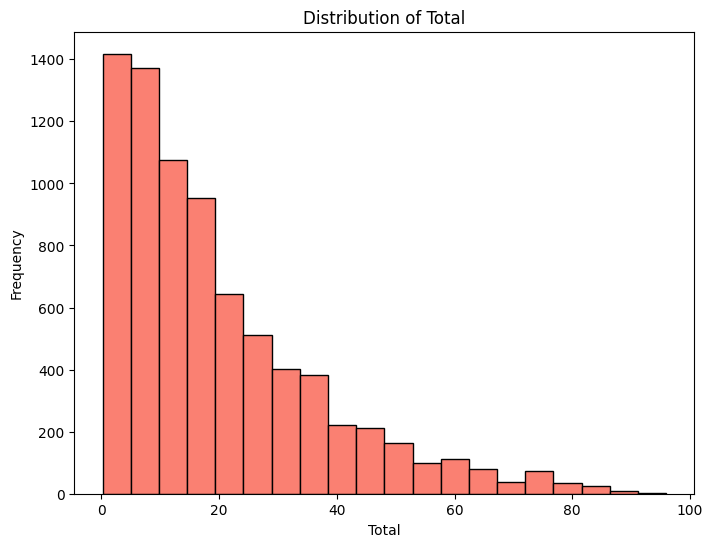

In [12]:

# Histogram of total
plt.figure(figsize=(8, 6))
plt.hist(sales_data['total'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribution of Total')
plt.show()

**Bar Chart of Categorical Columns:**

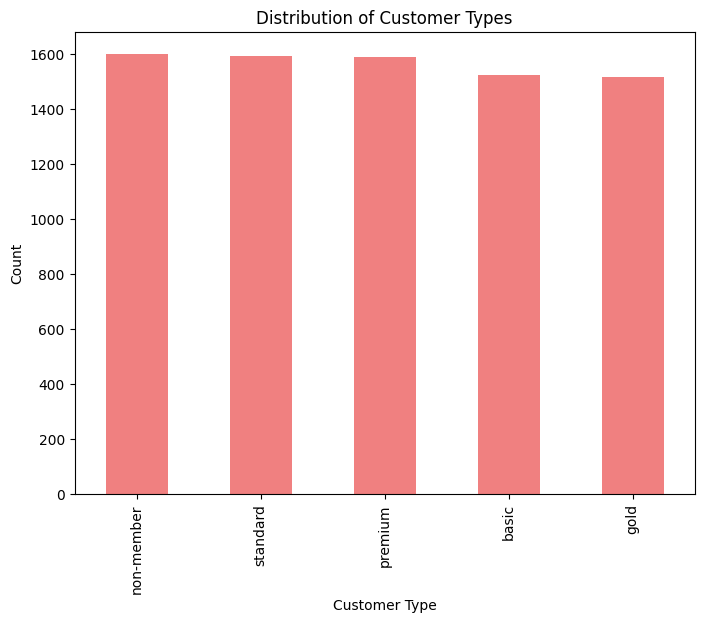

In [13]:
# Bar chart of customer_type
plt.figure(figsize=(8, 6))
sales_data['customer_type'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Distribution of Customer Types')
plt.show()

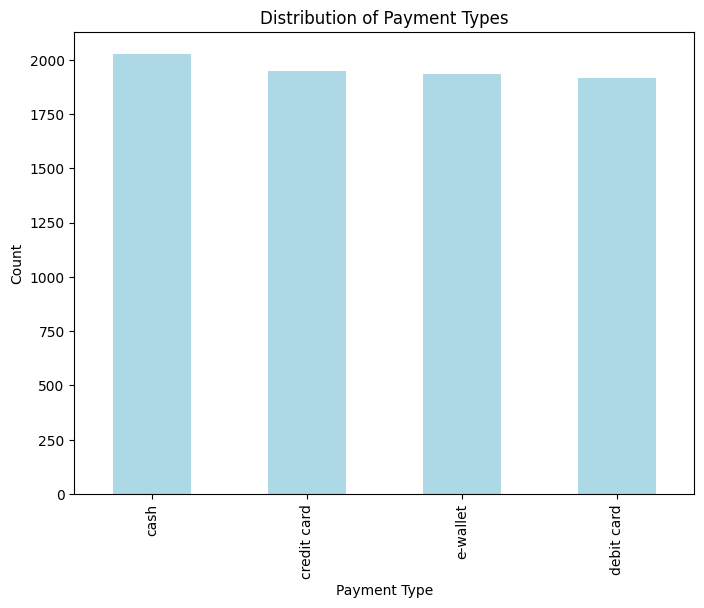

In [14]:
# Bar chart of payment_type
plt.figure(figsize=(8, 6))
sales_data['payment_type'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.show()


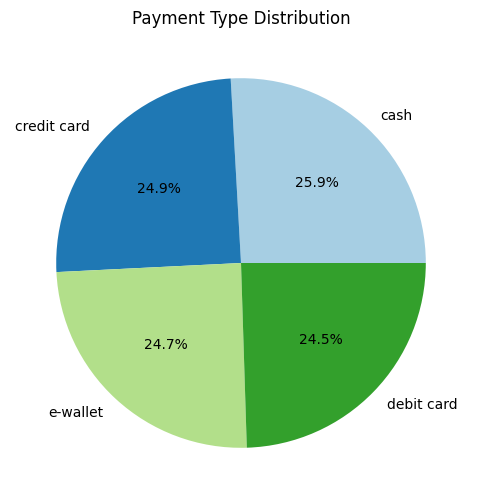

In [15]:
# Pie chart of payment_type distribution
payment_counts = sales_data['payment_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Payment Type Distribution')
plt.show()



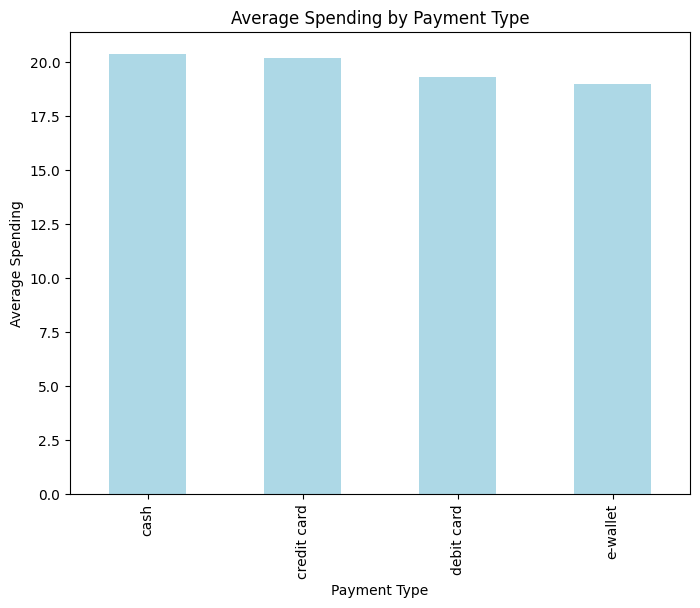

In [16]:
# Bar chart of average spending based on payment type
avg_spending_by_payment = sales_data.groupby('payment_type')['total'].mean()
plt.figure(figsize=(8, 6))
avg_spending_by_payment.plot(kind='bar', color='lightblue')
plt.xlabel('Payment Type')
plt.ylabel('Average Spending')
plt.title('Average Spending by Payment Type')
plt.show()

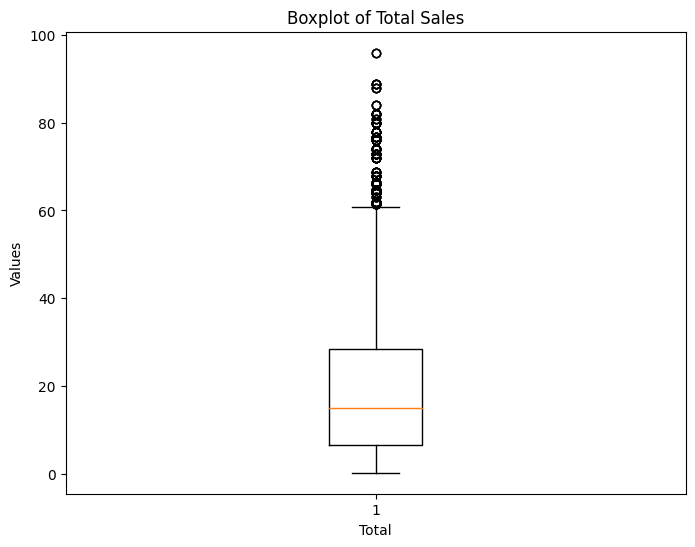

In [17]:
# Boxplot of the "total" variable
plt.figure(figsize=(8, 6))
plt.boxplot(sales_data['total'])
plt.xlabel('Total')
plt.ylabel('Values')
plt.title('Boxplot of Total Sales')
plt.show()

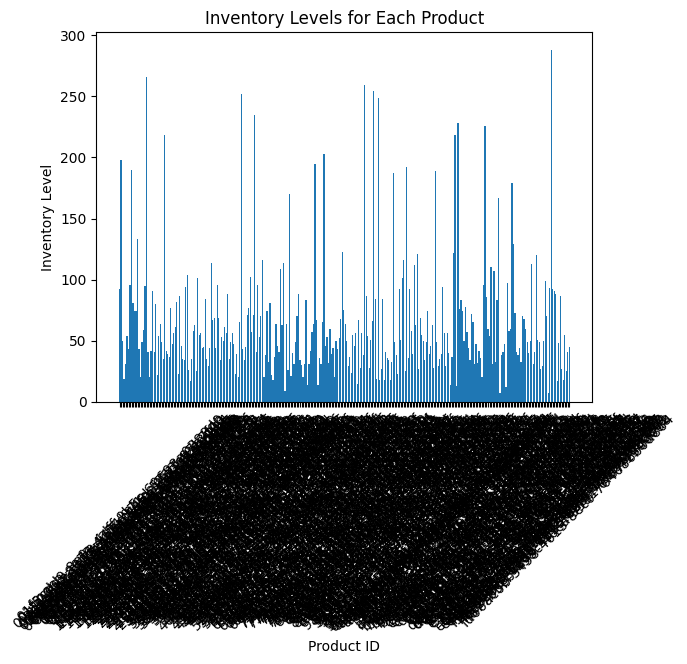

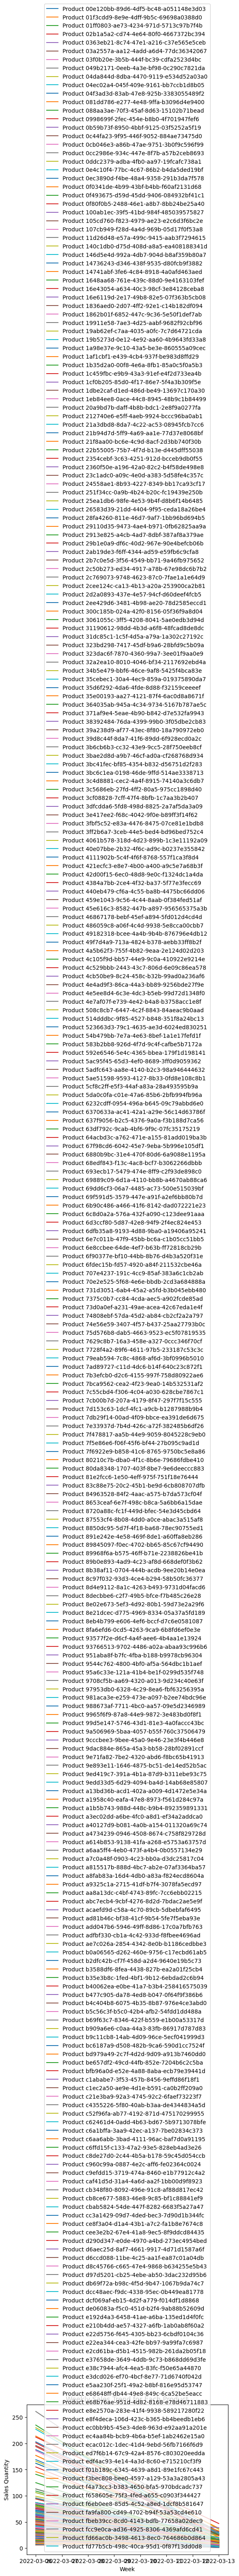

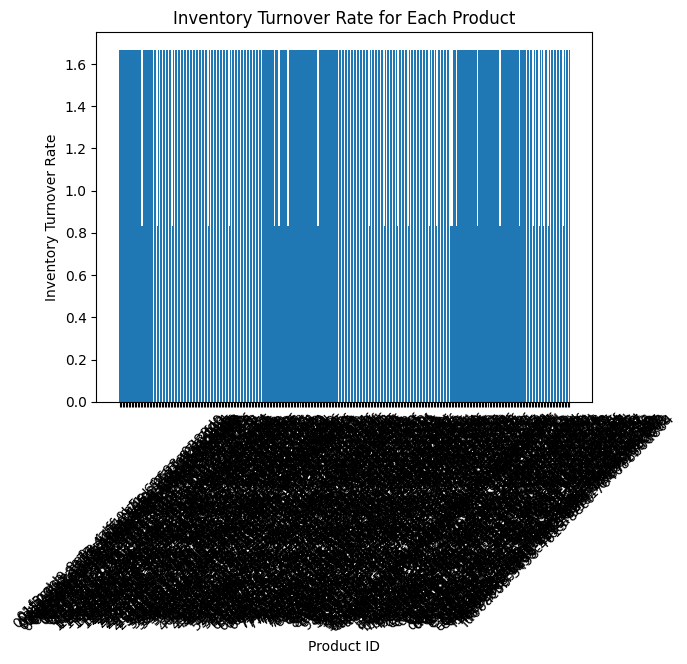

In [19]:
# Step 1: Calculate Inventory Levels
inventory_levels = sales_data.groupby('product_id')['quantity'].sum()

# Step 2: Analyze Demand and Sales Trends (Resample to Weekly)
sales_data['timestamp'] = pd.to_datetime(sales_data['timestamp'])
weekly_sales = sales_data.set_index('timestamp').groupby('product_id')['quantity'].resample('W').sum().unstack(level=0)

# Step 3: Identify Reorder Points
# Example: Set reorder point as 80% of the average weekly sales
reorder_points = weekly_sales.mean() * 0.8

# Step 4: Set Safety Stock Levels
# Example: Set safety stock as 20% of the average weekly sales
safety_stock_levels = weekly_sales.mean() * 0.2

# Step 5: Monitor Inventory Turnover Rate
# Example: Calculate inventory turnover rate as the total quantity sold divided by the average inventory
inventory_turnover = sales_data.groupby('product_id')['quantity'].sum() / (weekly_sales.mean() + safety_stock_levels)

# Visualize Inventory Levels
plt.bar(inventory_levels.index, inventory_levels.values)
plt.xlabel('Product ID')
plt.ylabel('Inventory Level')
plt.title('Inventory Levels for Each Product')
plt.xticks(rotation=45)
plt.show()

# Visualize Weekly Sales
for product_id in weekly_sales.columns:
    plt.plot(weekly_sales.index, weekly_sales[product_id], label=f'Product {product_id}')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Trend for Each Product')
plt.legend()
plt.show()

# Visualize Inventory Turnover
plt.bar(inventory_turnover.index, inventory_turnover.values)
plt.xlabel('Product ID')
plt.ylabel('Inventory Turnover Rate')
plt.title('Inventory Turnover Rate for Each Product')
plt.xticks(rotation=45)
plt.show()



## Section 5 - Summary

```
Question: "How to better stock the items that they sell"
```
The data reveal several hidden insights, and the following statements need to be taken into consideration for striking a balance between overstocking and understocking highly perishable items to enhance profitability and customer satisfaction:

- Identify current inventory levels for each product to manage stock quantities effectively.

- Analyze weekly sales trends to understand product demand and prioritize high-selling items.

- Set reorder points (80% of average weekly sales) to ensure timely restocking and prevent stockouts.

- Maintain safety stock levels (20% of average weekly sales) to handle demand fluctuations.

- Calculate inventory turnover rates to gauge product popularity and optimize stock management.

- Optimize stock levels for highly perishable items based on demand patterns.

- Consider data expansion from multiple stores and longer durations for more comprehensive insights.


Though deducing very accurately based on this limited dataset makes it very hard to answer the question. In order to make the next step on this project with the client, but the following things should be kept in mind:

- The current dataset suffers from **limitations due to its small size**, representing data from a single store and one week only. Consequently, the lack of diversity impedes drawing definitive conclusions or making informed decisions with confidence. To address this, it is essential to expand the dataset by collecting data from multiple stores and longer timeframes. A more extensive and varied dataset will enable more robust analyses and informed business decisions.

- **Include Additional Features**: Incorporate relevant features or variables that could influence customer behavior and purchasing decisions. For instance, customer demographics, promotional activities, or external factors like weather can all impact sales.

- **Focus on customer-favorite items** based on preferences.

- **Strategically use promotions** to stimulate sales

